In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# 손글씨 숫자 이미지 데이터셋
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test : 손글씨 숫자 이미지
# y_train, y_test : 이미지가 의미하는 숫자

In [28]:
# 손 글씨 숫자 이미지 데이터는 0~255사이의 값을 가짐
# 모델 훈련에 사용하기 전에 0~1사이의 범위를 갖도록 변경
x_train, x_test = x_train / 255.0, x_test / 255.0

In [29]:
# Model 생성
model = tf.keras.models.Sequential([
    # 크기 28*28의 배열을 입력받아 1차원 배열로 변환
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 히든레이어의 노드 갯수는 128개, 활성화 함수로 relu 사용
    tf.keras.layers.Dense(128, activation='relu'),
    # 오버피팅 방지, 이전 레이어의 출력을 20% 섞음
    tf.keras.layers.Dropout(0.2),
    # 출력 레이어의 노드개수를 10개로 설정, 활성화 함수 softmax 사용
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2873 - accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1349 - accuracy: 0.9600
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1002 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0812 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0689 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0409 - accuracy: 0.9868
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0807

[0.08069777488708496, 0.9776000380516052]

In [31]:
# x_train 랜덤한 가격을 추출
import numpy as np
import matplotlib.pyplot as plt

In [32]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

<function matplotlib.pyplot.show(close=None, block=None)>

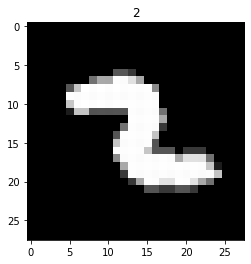

In [33]:
# image를 확인
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show

In [34]:
import os
from PIL import Image
import numpy as np

/Users/woojaejoo/Code/파이썬으로 만드는 인공지능 코드/강남 IT
/Users/woojaejoo/Code/파이썬으로 만드는 인공지능 코드/강남 IT/image_3.png


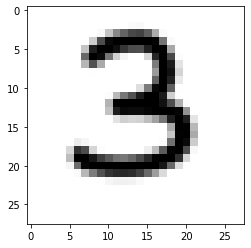

처음 : (28, 28, 3)


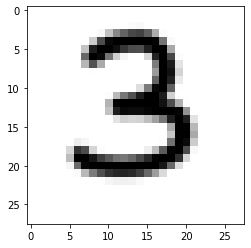

gray scale 적용 : (28, 28)


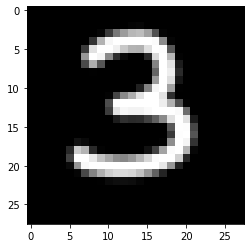

이미지 반전 및 정규화 적용 : (28, 28)


In [44]:
#image file의 경로 설정
cur_dir = os.getcwd()
print(cur_dir)
img_path = os.path.join(cur_dir, 'image_3.png')
print(img_path)
cur_img = Image.open(img_path) # 이미지 객체를 만들어줌

# 28 * 28 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img) # numpy array로 바꿔준다

plt.imshow(image, cmap='gray')
plt.show()
print(f'처음 : {image.shape}')

# color image일 경우 RGB의 평균값으로 gray scale로 적용
try :
    image = np.mean(image, axis=2)
except :
    pass

plt.imshow(image, cmap='gray')
plt.show()
print(f'gray scale 적용 : {image.shape}')



# upload한 image는 흰 배경에 검은 글시로 되어 있으므로 Mnist data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image)

# Mnist와 동일하게 data preprocessing (255로 나눠줌)
image = image.astype(np.float32) / 255.0

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()
print(f'이미지 반전 및 정규화 적용 : {image.shape}')

In [45]:
# shape를 변경하여 학습된 model에 넣고 결과를 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이즈
print(model.predict(image))
print('model이 예측한 값은 {} 입니다'.format(np.argmax(model.predict(image), -1))) # -1은 값을 안 넣겠다와 동일하다(최대값 한 개만 뽑아라.)

[[6.05086524e-14 5.16588883e-10 1.70422443e-09 9.99999523e-01
  2.85836922e-15 5.10288260e-07 2.77406597e-13 2.91606664e-13
  1.11588155e-10 1.95933994e-16]]
model이 예측한 값은 [3] 입니다


# Fashion Mnist

In [5]:
# Dataset
mnist = keras.datasets.fashion_mnist
class_name = ['T-shart/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [7]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [8]:
type(train_images)

numpy.ndarray

In [14]:
# Trainging set의 각 class별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [15]:
# Test set의 각 class별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

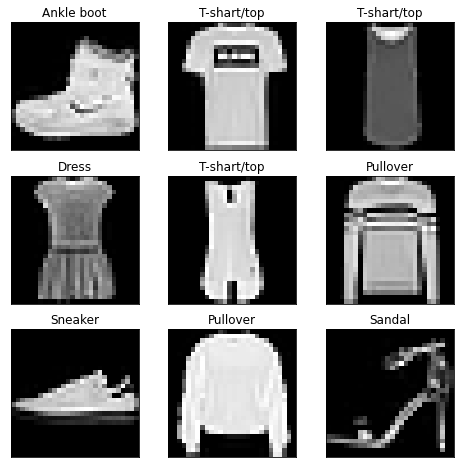

In [19]:
plt.figure(figsize=(8, 8))
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_name[train_labels[i]])
plt.show()

In [20]:
# 데이터 전처리
# image를 0~1 사이 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32) /255.0
train_image = test_images.astype(np.float32) /255.0

# one-hot Encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [21]:
# Dataset 만들기
# shuffle : 셔플을 하지 않으면 다음에 들어갈 데이터가 중복되어 들어갈 수 있음, epochs 할 때 shuffle을 사용
# batch : 한번에 여러개 이미지를 넣어주는데 몇개씩 넣을 것인지 설정
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(64)
test_dataset=tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape : (64, 28, 28)
Label batch shape : (64, 10)


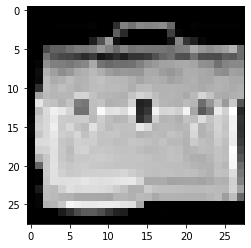

Label : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
# Dataset을 통해 반복(iterate)
imgs, lbs = next(iter(train_dataset))
print(f'Feature batch shape : {imgs.shape}')
print(f'Label batch shape : {lbs.shape}')

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {lb}')

In [37]:
# Custom Dataset 만들기
a = np.arange(10)
print(a)
print('-'*50)

ds_tensor = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensor)
print('-'*50)

for x in ds_tensor :
    print(x)

[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------
<TensorSliceDataset shapes: (), types: tf.int64>
--------------------------------------------------
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [38]:
# shuffle(정수)  : 큐 사이즈 만큼 셔플. 10은 모두 셔플, 10보다 작으면 일부만 셔플
ds_tensor = ds_tensor.map(tf.square).shuffle(10).batch(2)
for _ in range(3) :
    for x in ds_tensor :
        print(x)
    print('-'*50)

tf.Tensor([16  1], shape=(2,), dtype=int64)
tf.Tensor([36  9], shape=(2,), dtype=int64)
tf.Tensor([ 0 25], shape=(2,), dtype=int64)
tf.Tensor([49  4], shape=(2,), dtype=int64)
tf.Tensor([81 64], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([1 4], shape=(2,), dtype=int64)
tf.Tensor([36 16], shape=(2,), dtype=int64)
tf.Tensor([49  0], shape=(2,), dtype=int64)
tf.Tensor([81  9], shape=(2,), dtype=int64)
tf.Tensor([64 25], shape=(2,), dtype=int64)
--------------------------------------------------
tf.Tensor([81  0], shape=(2,), dtype=int64)
tf.Tensor([ 1 36], shape=(2,), dtype=int64)
tf.Tensor([16 49], shape=(2,), dtype=int64)
tf.Tensor([9 4], shape=(2,), dtype=int64)
tf.Tensor([25 64], shape=(2,), dtype=int64)
--------------------------------------------------
